In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [4]:
### define state
class State(TypedDict):
    number1: int
    operation: str
    number2: int
    result: int

In [6]:
### define actions

def adder(state:State)->State:
    """Add two numbers"""
    state['result'] = state['number1'] + state['number2']
    return state

def subtractor(state:State)->State:
    """Subtract two numbers"""
    state['result'] = state['number1'] - state['number2']
    return state

def router(state:State)->State:
    """Route the operation to the appropriate function"""
    if state['operation'] == '+':
        return "addition_operation"
    elif state['operation'] == '-':
        return "subtractor_operation"

In [ ]:
### create graph
graph = StateGraph(State)

### define graph nodes
graph.add_node("router", lambda state:state) ### since this is a conditional node the state entering should be the same as the state leaving
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)

### define Edges
graph.add_edge(START, "router")

graph.add_conditional_edges( ### conditional edge node, action, edges
    "router",
    router,
    {
        #Edge:node
        "addition_operation": "add_node",
        "subtractor_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

### compile graph

app = graph.compile()

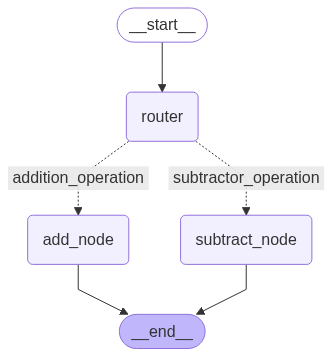

In [8]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
agentstate = State(number1=3,operation="-",number2=5)
answer = app.invoke(agentstate)
answer

{'number1': 3, 'operation': '-', 'number2': 5, 'result': -2}